# <center> Which factors have the biggest impact on happiness? <center>
 <center> Data Analysis of the Better Life Index and the World Happiness Index </center>

__Author__: Dóra Kőhalmi

__Date__: 03.04.2025

-------------------------------------

## Introduction

This Jupyter Notebook aims to answer the research question: **Which factors have the biggest impact on happiness?** To address this question we bring together two datasets:

- The **World Happiness Index (2024):** A subjective measure of well-being that captures how people evaluate their own happiness and life satisfaction across countries, represented as an index between 0 and 10.
- The **OECD Better Life Index:**  An objective dataset that provides insights into 11 key dimensions of life across 41 OECD countries: 
Housing, Income, Jobs, Community, Education, Environment, Civic Engagement, Health, Life Satisfaction, Safety and Work-Life Balance. Each of these dimensions is represented by an index between 0 and 10, based on 1–4 underlying indicators. For example the Housing index was calculated based on Housing Expenditure (proportion of income spent on housing), Basic Facilities (percentage of people with indoor flushing toilets in their home) and Rooms per Person (average number of rooms available per person in a dwelling). The data for all these Indicators are also included in the dataset, together with the information about Population, number of Visitors per year and the percentage of Renewable Energy used in the country. For many Indicators there are also information about the gender and social inequalities experienced in that aspect of life. This information though is not consistently available for all the countries.



## Analysis Plan

The goal of this notebook is to:

1. **Explore** the Better Life Index dataset  
2. **Merge** it with the World Happiness Index  
3. **Analyze** the correlation between Better Life Index dimensions and happiness  
4. **Identify** the most influential factors on happiness and life satisfaction




## Data Sources & Preparation

- **OECD Better Life Index**
  - Scraped from: [oecdbetterlifeindex.org](https://www.oecdbetterlifeindex.org/)  
  - Extracted using: `/src/scrape.betterlife.py`  
  - Raw data location: `/data/raw/betterlife.raw.csv`  
  - Cleaned using: `/src/clean.betterlife.py`  
  - Cleaned data saved in: `/data/clean/betterlife.csv`

- **World Happiness Index (2024)**
  - Downloaded from: [World Happiness Report 2025](https://worldhappiness.report/ed/2025/#appendices-and-data)  
  - Format: `.xlsx` file

---


In [83]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pwd

'C:\\Users\\kohal\\OneDrive\\Desktop\\Study\\HSLU_2_Semester\\CIP\\Project_Happiness\\CIP_FS25_202'

 
## Load the data

Load the Better Life Index and the Happiness Index datasets.

In [89]:
df_betterlife=pd.read_csv("data/clean/betterlife.clean.csv")
df_betterlife.head()

,Country,Population,Visitors,Renewable_Energy,Housing,Income,Jobs,Community,Education,Environment,...,Gender_Inequality_Satisfaction,Social_Inequality_Satisfaction,Safe_at_Night,Gender_Inequality_Safety,Homicide_Rate,Gender_Inequality_Homicide,Long_Hours,Gender_Inequality_Long_Hours,Free_Time,Gender_Inequality_Free_Time
0,Australia,24.9,6.1,4.6,8.2,5.9,8.6,7.7,8.6,8.9,...,1.02,1.06,66.95,1.50,0.9,2.17,12.5,3.06,14.4,1.08
1,Austria,8.9,18.9,29.5,6.3,4.7,8.5,7.2,6.8,7.6,...,1.03,1.05,85.68,1.09,0.5,1.00,5.3,3.45,14.5,1.02
2,Belgium,11.5,6.2,5.1,7.6,5.2,8.0,6.0,7.9,5.8,...,1.01,1.08,56.50,1.42,1.1,1.75,4.3,2.21,15.5,1.02
3,Brazil,209.5,5.2,45.8,4.7,0.5,4.3,2.7,2.3,4.8,...,1.03,1.09,44.78,1.61,19.0,10.76,5.6,2.03,14.6,NaN
4,Canada,37.1,25.3,17.9,7.8,5.3,8.4,7.5,7.8,8.6,...,1.00,1.05,77.50,1.31,1.2,2.57,3.3,4.50,14.6,1.01


In [90]:
df_happiness=pd.read_excel("data/clean/happinessindex.xlsx")
df_happiness.head()

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895


## 1. Exploratory Data Analysis of Better Life Index dataframe:

The Better Life data set has already been cleaned using the /src/clean.betterlife.py script. 
The dataset has 41 rows and 63 columns. 
We see that the first column containing the country names is a string variable (object datatype), all the other columns of the data frame is numeric variable (float64 datatype), so the datatypes of the columns are correct.


In [91]:
# Print the size of the dataframe:
df_betterlife.shape

(41, 63)

In [92]:
# Print column names:
df_betterlife.columns

Index(['Country', 'Population', 'Visitors', 'Renewable_Energy', 'Housing',
       'Income', 'Jobs', 'Community', 'Education', 'Environment',
       'Civic_Engagement', 'Health', 'Life_Satisfaction', 'Safety',
       'Work_Life_Balance', 'Rooms_per_person', 'Basic_Facilities',
       'Housing_Expenditure', 'Net_Disposable_Income',
       'Social_Inequality_Income', 'Net_wealth', 'Employment_Rate',
       'Gender_Inequality_Employment', 'Social_Inequality_Employment',
       'Long_Term_Unemployment', 'Gender_Inequality_Unemployment',
       'Social_Inequality_Unemployment', 'Personal_Earnings',
       'Gender_Inequality_Earnings', 'Social_Inequality_Earnings',
       'Job_Security', 'Quality_of_Support_Network',
       'Gender_Inequality_Community', 'Social_Inequality_Community',
       'Educational_Attainment', 'Gender_Inequality_Education',
       'Student_Skills', 'Gender_Inequality_Skills',
       'Social_Inequality_Skills', 'Years_in_Education',
       'Gender_Inequality_Years_Educa

In [93]:
# Check the data type of the columns and the number of missing values:
df_betterlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            41 non-null     object 
 1   Population                         39 non-null     float64
 2   Visitors                           38 non-null     float64
 3   Renewable_Energy                   37 non-null     float64
 4   Housing                            41 non-null     float64
 5   Income                             41 non-null     float64
 6   Jobs                               41 non-null     float64
 7   Community                          41 non-null     float64
 8   Education                          41 non-null     float64
 9   Environment                        41 non-null     float64
 10  Civic_Engagement                   41 non-null     float64
 11  Health                             41 non-null     float64
 

### 1.1 Check missing values:

There are missing values in the data set, mostly in some kind of Inequality columns as this data was for some countries not available.


In [94]:
# Print the number of missing values in each column:

pd.set_option('display.max_rows', None) # By default we would not see all the values (too long)
print(df_betterlife.isnull().sum().sort_values(ascending=False))
pd.reset_option('display.max_rows')  # Reset to default after printing
#df_betterlife.isnull().sum().sort_values(ascending=False).head(25)


Gender_Inequality_Free_Time          19
Social_Inequality_Earnings            9
Social_Inequality_Unemployment        8
Gender_Inequality_Earnings            8
Social_Inequality_Income              6
Social_Inequality_Voter               6
Social_Inequality_Health              6
Renewable_Energy                      4
Visitors                              3
Social_Inequality_Employment          3
Gender_Inequality_Unemployment        2
Social_Inequality_Community           2
Population                            2
Gender_Inequality_Voter               2
Gender_Inequality_Years_Education     2
Social_Inequality_Skills              2
Gender_Inequality_Skills              2
Social_Inequality_Satisfaction        2
Gender_Inequality_Health              2
Gender_Inequality_Long_Hours          2
Gender_Inequality_Education           1
Life_Satisfaction                     0
Health                                0
Work_Life_Balance                     0
Safety                                0


In [95]:
# Print number of rows with missing values:
print(f"Number of rows with missing values: {df_betterlife.isnull().any(axis=1).sum()}")


Number of rows with missing values: 27


In [96]:
# Print all rows with missing data:
df_betterlife[df_betterlife.isnull().any(axis=1)]

,Country,Population,Visitors,Renewable_Energy,Housing,Income,Jobs,Community,Education,Environment,...,Gender_Inequality_Satisfaction,Social_Inequality_Satisfaction,Safe_at_Night,Gender_Inequality_Safety,Homicide_Rate,Gender_Inequality_Homicide,Long_Hours,Gender_Inequality_Long_Hours,Free_Time,Gender_Inequality_Free_Time
2,Belgium,11.5,6.2,5.10,7.6,5.2,8.0,6.0,7.9,5.8,...,1.01,1.08,56.50,1.42,1.10,1.75,4.3,2.21,15.5,1.02
3,Brazil,209.5,5.2,45.80,4.7,0.5,4.3,2.7,2.3,4.8,...,1.03,1.09,44.78,1.61,19.00,10.76,5.6,2.03,14.6,NaN
5,Chile,18.7,3.6,24.10,6.7,1.4,5.5,5.3,4.5,1.1,...,1.02,1.13,40.69,1.77,2.40,6.00,7.7,1.93,14.0,NaN
6,Colombia,49.7,NaN,NaN,4.1,0.5,5.2,1.3,1.4,4.1,...,1.01,1.26,49.52,1.19,23.10,10.49,23.7,1.65,13.3,NaN
7,Costa Rica,NaN,NaN,NaN,6.3,1.1,5.2,2.6,2.0,5.9,...,1.04,1.08,47.12,1.62,10.00,10.11,22.0,2.20,13.5,NaN
8,Czechia,10.7,24.0,7.50,5.4,2.5,7.7,9.1,7.8,6.3,...,1.00,1.10,77.43,1.31,0.70,1.33,4.5,3.40,15.1,NaN
9,Denmark,5.8,20.6,24.40,6.3,3.3,8.7,8.3,8.0,8.3,...,1.03,1.02,85.26,1.23,0.50,1.75,1.1,20.77,15.7,NaN
16,Iceland,0.3,0.7,84.70,6.5,6.4,9.7,10.0,6.8,9.7,...,1.05,NaN,85.38,1.20,0.30,2.40,11.7,3.56,14.5,NaN
17,Ireland,4.8,6.0,6.10,7.4,4.1,8.1,8.9,7.6,7.1,...,1.04,1.04,76.32,1.27,0.50,8.00,4.7,4.69,14.5,1.01
18,Israel,8.4,3.5,4.88,5.2,3.7,7.5,8.6,5.5,4.0,...,1.01,1.05,79.77,1.09,1.50,3.43,14.1,3.17,14.3,NaN


 #### The 'Population' column in our data has missing entries for Costa Rica and Lithuania. Given the importance and ready availability of this characteristic from reliable sources such as [World Bank Data](https://data.worldbank.org/indicator/SP.POP.TOTL?locations=CR) (Costa Rica: 5.1 Million, Lithuania: 2.9 Million), these values can be easily incorporated. 

In [97]:
# Set correct values for missing Population data:
correct_population_costa_rica = 5.1
correct_population_lithuania = 2.9

# Replace missing value:
df_betterlife.loc[df_betterlife['Country'] == 'Costa Rica', 'Population'] = correct_population_costa_rica

# Replace missing
df_betterlife.loc[df_betterlife['Country'] == 'Lithuania', 'Population'] = correct_population_lithuania

# Verify the updates (optional)
df_betterlife[df_betterlife['Country'].isin(['Costa Rica', 'Lithuania'])]

,Country,Population,Visitors,Renewable_Energy,Housing,Income,Jobs,Community,Education,Environment,...,Gender_Inequality_Satisfaction,Social_Inequality_Satisfaction,Safe_at_Night,Gender_Inequality_Safety,Homicide_Rate,Gender_Inequality_Homicide,Long_Hours,Gender_Inequality_Long_Hours,Free_Time,Gender_Inequality_Free_Time
7,Costa Rica,5.1,NaN,NaN,6.3,1.1,5.2,2.6,2.0,5.9,...,1.04,1.08,47.12,1.62,10.00,10.11,22.0,2.2,13.5,NaN
23,Lithuania,2.9,NaN,NaN,5.8,2.7,7.0,5.5,7.7,6.9,...,1.08,1.15,62.22,1.24,2.47,4.17,1.0,1.4,15.1,NaN


### 1.2 Check Inequality columns

There are many columns in the Better Life dataset describing social or gender inequality in a particular aspect of life:

In [98]:
# We take a look at the Inequality columns:
# Print column names:
#print(df_betterlife.columns)

# Choose column names that contain "Inequality":
inequality_columnnames= [col for col in df_betterlife.columns if "Inequality" in col]
print("Inequality columns: ", inequality_columnnames)
print(f"Number of Inequality columns: {len(inequality_columnnames)}")
print()

# Choose column names that do not contain "Inequality":
non_inequality_columnnames= [col for col in df_betterlife.columns if not "Inequality" in col]
print("Not Inequality columns: ", non_inequality_columnnames)
print(f"Number of Non Inequality columns: {len(non_inequality_columnnames)}")


Inequality columns:  ['Social_Inequality_Income', 'Gender_Inequality_Employment', 'Social_Inequality_Employment', 'Gender_Inequality_Unemployment', 'Social_Inequality_Unemployment', 'Gender_Inequality_Earnings', 'Social_Inequality_Earnings', 'Gender_Inequality_Community', 'Social_Inequality_Community', 'Gender_Inequality_Education', 'Gender_Inequality_Skills', 'Social_Inequality_Skills', 'Gender_Inequality_Years_Education', 'Gender_Inequality_Voter', 'Social_Inequality_Voter', 'Gender_Inequality_Life_Expectancy', 'Gender_Inequality_Health', 'Social_Inequality_Health', 'Gender_Inequality_Satisfaction', 'Social_Inequality_Satisfaction', 'Gender_Inequality_Safety', 'Gender_Inequality_Homicide', 'Gender_Inequality_Long_Hours', 'Gender_Inequality_Free_Time']
Number of Inequality columns: 24

Not Inequality columns:  ['Country', 'Population', 'Visitors', 'Renewable_Energy', 'Housing', 'Income', 'Jobs', 'Community', 'Education', 'Environment', 'Civic_Engagement', 'Health', 'Life_Satisfaction'

 #### Let's take a look at the distributions of the Inequality columns:

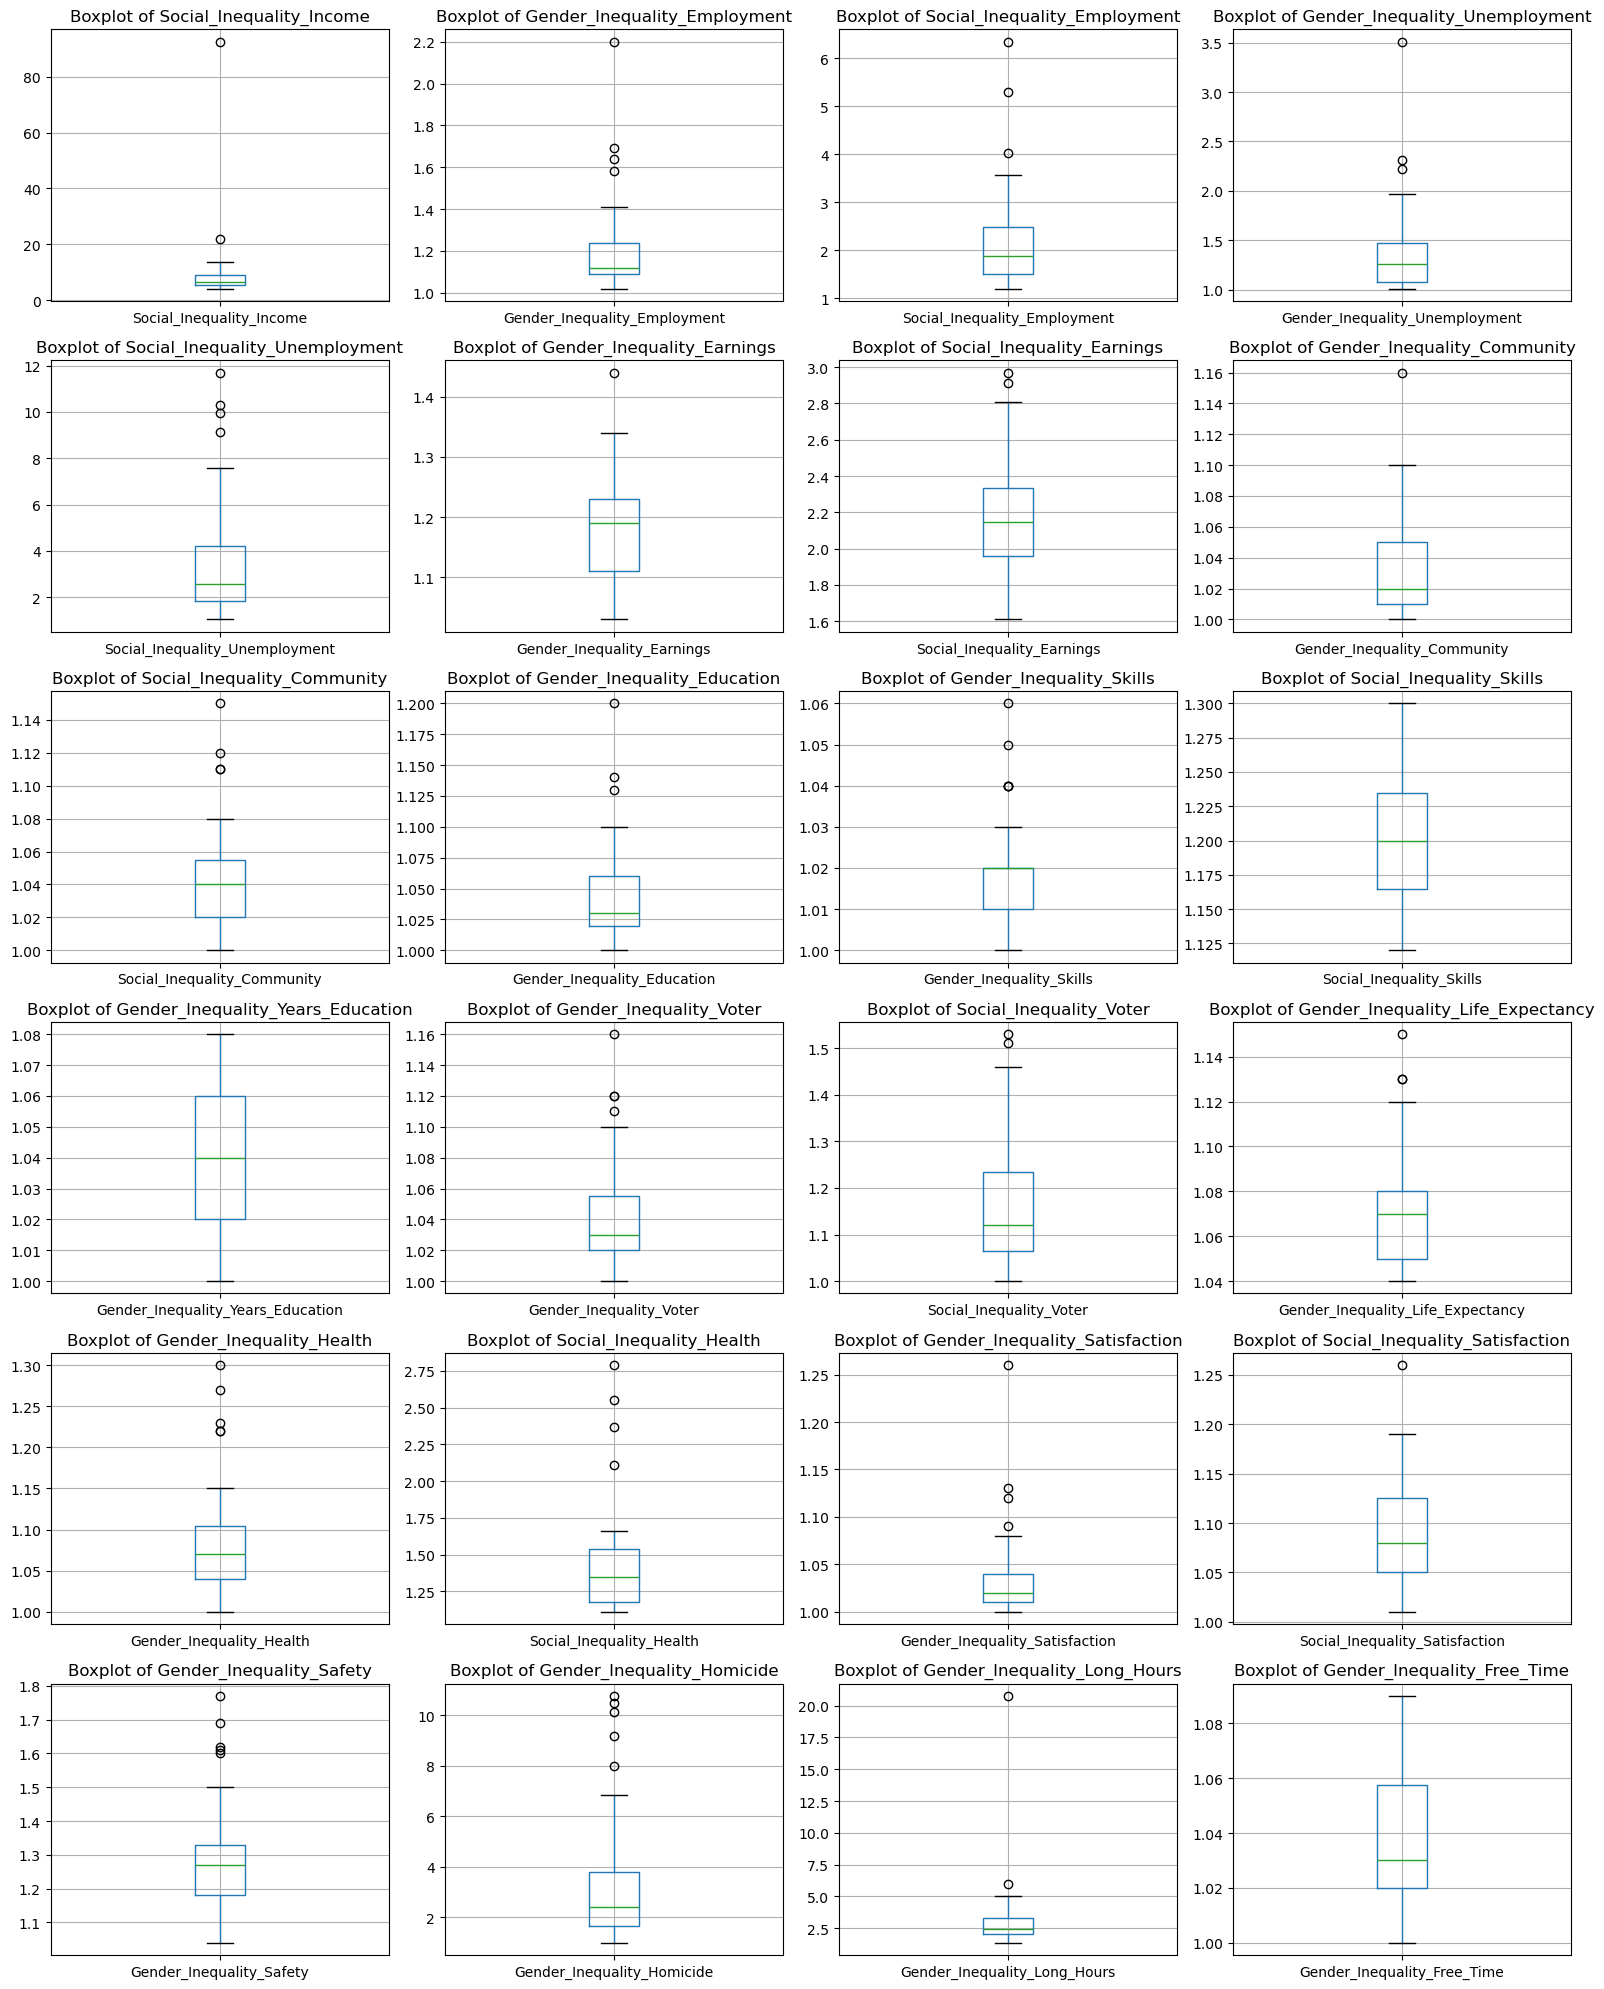

In [100]:
# Let's check the distribution of the values in the 

# Create separate boxplots for each numerical column. There are 38 numerical columns, so if we put 4 plots in a row, we will have 10 rows:
# Create subplots (4 columns, 6 rows)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 20))

# For easier iteration through the axes, we flatten axes out:
axes = axes.flatten()


# Loop through all the numeric columns and create a boxplot:
for i, column in enumerate(inequality_columnnames):
    df_betterlife[[column]].boxplot(ax=axes[i])  
    axes[i].set_title(f'Boxplot of {column}')


# Show all plots together
plt.tight_layout()
plt.show()


### 1.3 Drop Inequality Data Columns

Our main goal is to understand the impact of different aspects of life on well-being and happiness, thus we drop all the Inequality columns as they are not in the main focus of the research question and they also have much more missing values as the rest of the dataframe.

Many of the Inequality columns have very similar values among all the countries as we see it from the boxplots. For example for the column "Gender_inequality_Free_Time" has all its values in the range between 1.02 and 1.06. There are, though, a few columns among the Inequality columns with a much more variability, so in a further analysis it would be very interesting to take them also into account. 

In [101]:
# Drop all Inequality columns:
df_betterlife = df_betterlife.drop(columns=inequality_columnnames)
df_betterlife.head()


,Country,Population,Visitors,Renewable_Energy,Housing,Income,Jobs,Community,Education,Environment,...,Water_Quality,Voter_Turnout,Stakeholder_Engagement,Life_Expectancy,Self_Reported_Health,Life_Satisfaction_2,Safe_at_Night,Homicide_Rate,Long_Hours,Free_Time
0,Australia,24.9,6.1,4.6,8.2,5.9,8.6,7.7,8.6,8.9,...,92.0,91.9,2.7,83.0,85.2,7.1,66.95,0.9,12.5,14.4
1,Austria,8.9,18.9,29.5,6.3,4.7,8.5,7.2,6.8,7.6,...,92.0,75.6,1.3,82.0,71.2,7.2,85.68,0.5,5.3,14.5
2,Belgium,11.5,6.2,5.1,7.6,5.2,8.0,6.0,7.9,5.8,...,79.0,88.4,2.0,82.1,74.0,6.8,56.50,1.1,4.3,15.5
3,Brazil,209.5,5.2,45.8,4.7,0.5,4.3,2.7,2.3,4.8,...,70.0,79.8,2.2,75.9,69.8,6.1,44.78,19.0,5.6,14.6
4,Canada,37.1,25.3,17.9,7.8,5.3,8.4,7.5,7.8,8.6,...,90.0,67.7,2.9,82.1,88.8,7.0,77.50,1.2,3.3,14.6


### 1.4 Check Missing values in the remaining dataset

In [21]:
df_betterlife.isnull().sum().sort_values(ascending=False)

Renewable_Energy              4
Visitors                      3
Country                       0
Population                    0
Housing                       0
Income                        0
Jobs                          0
Community                     0
Education                     0
Environment                   0
Civic_Engagement              0
Health                        0
Life_Satisfaction             0
Safety                        0
Work_Life_Balance             0
Rooms_per_person              0
Basic_Facilities              0
Housing_Expenditure           0
Net_Disposable_Income         0
Net_wealth                    0
Employment_Rate               0
Long_Term_Unemployment        0
Personal_Earnings             0
Job_Security                  0
Quality_of_Support_Network    0
Educational_Attainment        0
Student_Skills                0
Years_in_Education            0
Air_Pollution                 0
Water_Quality                 0
Voter_Turnout                 0
Stakehol

In [104]:
# Print all rows with missing data:
df_betterlife[df_betterlife.isnull().any(axis=1)]

,Country,Population,Visitors,Renewable_Energy,Housing,Income,Jobs,Community,Education,Environment,...,Water_Quality,Voter_Turnout,Stakeholder_Engagement,Life_Expectancy,Self_Reported_Health,Life_Satisfaction_2,Safe_at_Night,Homicide_Rate,Long_Hours,Free_Time
6,Colombia,49.7,NaN,NaN,4.1,0.5,5.2,1.3,1.4,4.1,...,82.0,53.4,1.4,76.7,80.4,5.7,49.52,23.10,23.7,13.3
7,Costa Rica,5.1,NaN,NaN,6.3,1.1,5.2,2.6,2.0,5.9,...,87.0,65.7,1.8,80.5,73.5,6.3,47.12,10.00,22.0,13.5
22,Latvia,1.9,6.2,NaN,4.5,1.3,6.9,7.1,7.5,6.4,...,83.0,54.6,2.2,75.5,47.1,6.2,72.32,3.70,1.6,15.1
23,Lithuania,2.9,NaN,NaN,5.8,2.7,7.0,5.5,7.7,6.9,...,83.0,57.4,2.4,76.4,46.1,6.4,62.22,2.47,1.0,15.1


In [105]:
# Missing values in "Population" column:
df_betterlife[df_betterlife["Population"].isnull()]

,Country,Population,Visitors,Renewable_Energy,Housing,Income,Jobs,Community,Education,Environment,...,Water_Quality,Voter_Turnout,Stakeholder_Engagement,Life_Expectancy,Self_Reported_Health,Life_Satisfaction_2,Safe_at_Night,Homicide_Rate,Long_Hours,Free_Time


In [106]:
# Missing values in "Renewable Energy" column:
df_betterlife[df_betterlife["Renewable_Energy"].isnull()]

,Country,Population,Visitors,Renewable_Energy,Housing,Income,Jobs,Community,Education,Environment,...,Water_Quality,Voter_Turnout,Stakeholder_Engagement,Life_Expectancy,Self_Reported_Health,Life_Satisfaction_2,Safe_at_Night,Homicide_Rate,Long_Hours,Free_Time
6,Colombia,49.7,NaN,NaN,4.1,0.5,5.2,1.3,1.4,4.1,...,82.0,53.4,1.4,76.7,80.4,5.7,49.52,23.10,23.7,13.3
7,Costa Rica,5.1,NaN,NaN,6.3,1.1,5.2,2.6,2.0,5.9,...,87.0,65.7,1.8,80.5,73.5,6.3,47.12,10.00,22.0,13.5
22,Latvia,1.9,6.2,NaN,4.5,1.3,6.9,7.1,7.5,6.4,...,83.0,54.6,2.2,75.5,47.1,6.2,72.32,3.70,1.6,15.1
23,Lithuania,2.9,NaN,NaN,5.8,2.7,7.0,5.5,7.7,6.9,...,83.0,57.4,2.4,76.4,46.1,6.4,62.22,2.47,1.0,15.1


In [107]:
# Missing values in "Visitors" column:
df_betterlife[df_betterlife["Visitors"].isnull()]

,Country,Population,Visitors,Renewable_Energy,Housing,Income,Jobs,Community,Education,Environment,...,Water_Quality,Voter_Turnout,Stakeholder_Engagement,Life_Expectancy,Self_Reported_Health,Life_Satisfaction_2,Safe_at_Night,Homicide_Rate,Long_Hours,Free_Time
6,Colombia,49.7,NaN,NaN,4.1,0.5,5.2,1.3,1.4,4.1,...,82.0,53.4,1.4,76.7,80.4,5.7,49.52,23.10,23.7,13.3
7,Costa Rica,5.1,NaN,NaN,6.3,1.1,5.2,2.6,2.0,5.9,...,87.0,65.7,1.8,80.5,73.5,6.3,47.12,10.00,22.0,13.5
23,Lithuania,2.9,NaN,NaN,5.8,2.7,7.0,5.5,7.7,6.9,...,83.0,57.4,2.4,76.4,46.1,6.4,62.22,2.47,1.0,15.1


#### We have 4 rows with missing values. From the column "Visitors" three values are missing and from the column "Renewable_Energy" four values are missing. The other columns do not have any missing values. As "Visitors" and "Renewable_Energy" are not relevant for our analysis, we leave the values as NaN.

### 1.5 Descriptive statistics of the columns

In [26]:
df_betterlife.describe()

,Population,Visitors,Renewable_Energy,Housing,Income,Jobs,Community,Education,Environment,Civic_Engagement,...,Water_Quality,Voter_Turnout,Stakeholder_Engagement,Life_Expectancy,Self_Reported_Health,Life_Satisfaction_2,Safe_at_Night,Homicide_Rate,Long_Hours,Free_Time
count,41.000000,38.000000,37.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,42.626829,25.155263,16.152162,6.192683,3.587805,7.146341,6.480488,6.317073,6.241463,5.304878,...,83.317073,69.192683,2.104878,80.260976,67.919512,6.600000,72.064878,3.289512,7.702439,14.878049
std,63.448385,34.964806,16.696386,1.335550,2.187258,1.909987,2.531622,2.137394,2.409147,1.921582,...,9.719668,12.210843,0.602059,3.845249,13.300136,0.725259,14.310102,6.251888,7.395589,0.666150
min,0.300000,0.700000,0.700000,2.600000,0.100000,0.000000,0.000000,1.000000,0.300000,1.200000,...,62.000000,45.100000,0.800000,64.200000,33.700000,4.900000,39.980000,0.200000,0.100000,13.300000
25%,5.500000,6.025000,6.030000,5.300000,1.800000,6.200000,5.500000,5.500000,4.800000,3.900000,...,78.000000,62.800000,1.600000,78.600000,61.900000,6.100000,66.150000,0.500000,2.500000,14.500000
50%,10.700000,11.150000,10.200000,6.500000,3.600000,7.500000,7.500000,7.000000,6.700000,5.900000,...,83.000000,67.700000,2.100000,81.700000,69.800000,6.500000,76.320000,0.900000,4.500000,15.000000
75%,52.400000,24.975000,21.200000,7.000000,4.800000,8.400000,8.300000,7.800000,8.100000,6.800000,...,91.000000,78.200000,2.500000,82.900000,75.200000,7.200000,82.020000,1.900000,11.700000,15.100000
max,311.600000,171.600000,84.700000,8.600000,9.300000,9.700000,10.000000,9.200000,9.800000,8.900000,...,98.000000,91.900000,3.200000,84.400000,88.800000,7.900000,93.160000,26.800000,27.000000,16.500000


### 1.6 Check outliers

In [108]:
# Print number of columns: 
df_betterlife.shape[1]

39

In [110]:
# List of numerical columns:
df_betterlife.select_dtypes(include='number').columns

Index(['Population', 'Visitors', 'Renewable_Energy', 'Housing', 'Income',
       'Jobs', 'Community', 'Education', 'Environment', 'Civic_Engagement',
       'Health', 'Life_Satisfaction', 'Safety', 'Work_Life_Balance',
       'Rooms_per_person', 'Basic_Facilities', 'Housing_Expenditure',
       'Net_Disposable_Income', 'Net_wealth', 'Employment_Rate',
       'Long_Term_Unemployment', 'Personal_Earnings', 'Job_Security',
       'Quality_of_Support_Network', 'Educational_Attainment',
       'Student_Skills', 'Years_in_Education', 'Air_Pollution',
       'Water_Quality', 'Voter_Turnout', 'Stakeholder_Engagement',
       'Life_Expectancy', 'Self_Reported_Health', 'Life_Satisfaction_2',
       'Safe_at_Night', 'Homicide_Rate', 'Long_Hours', 'Free_Time'],
      dtype='object')

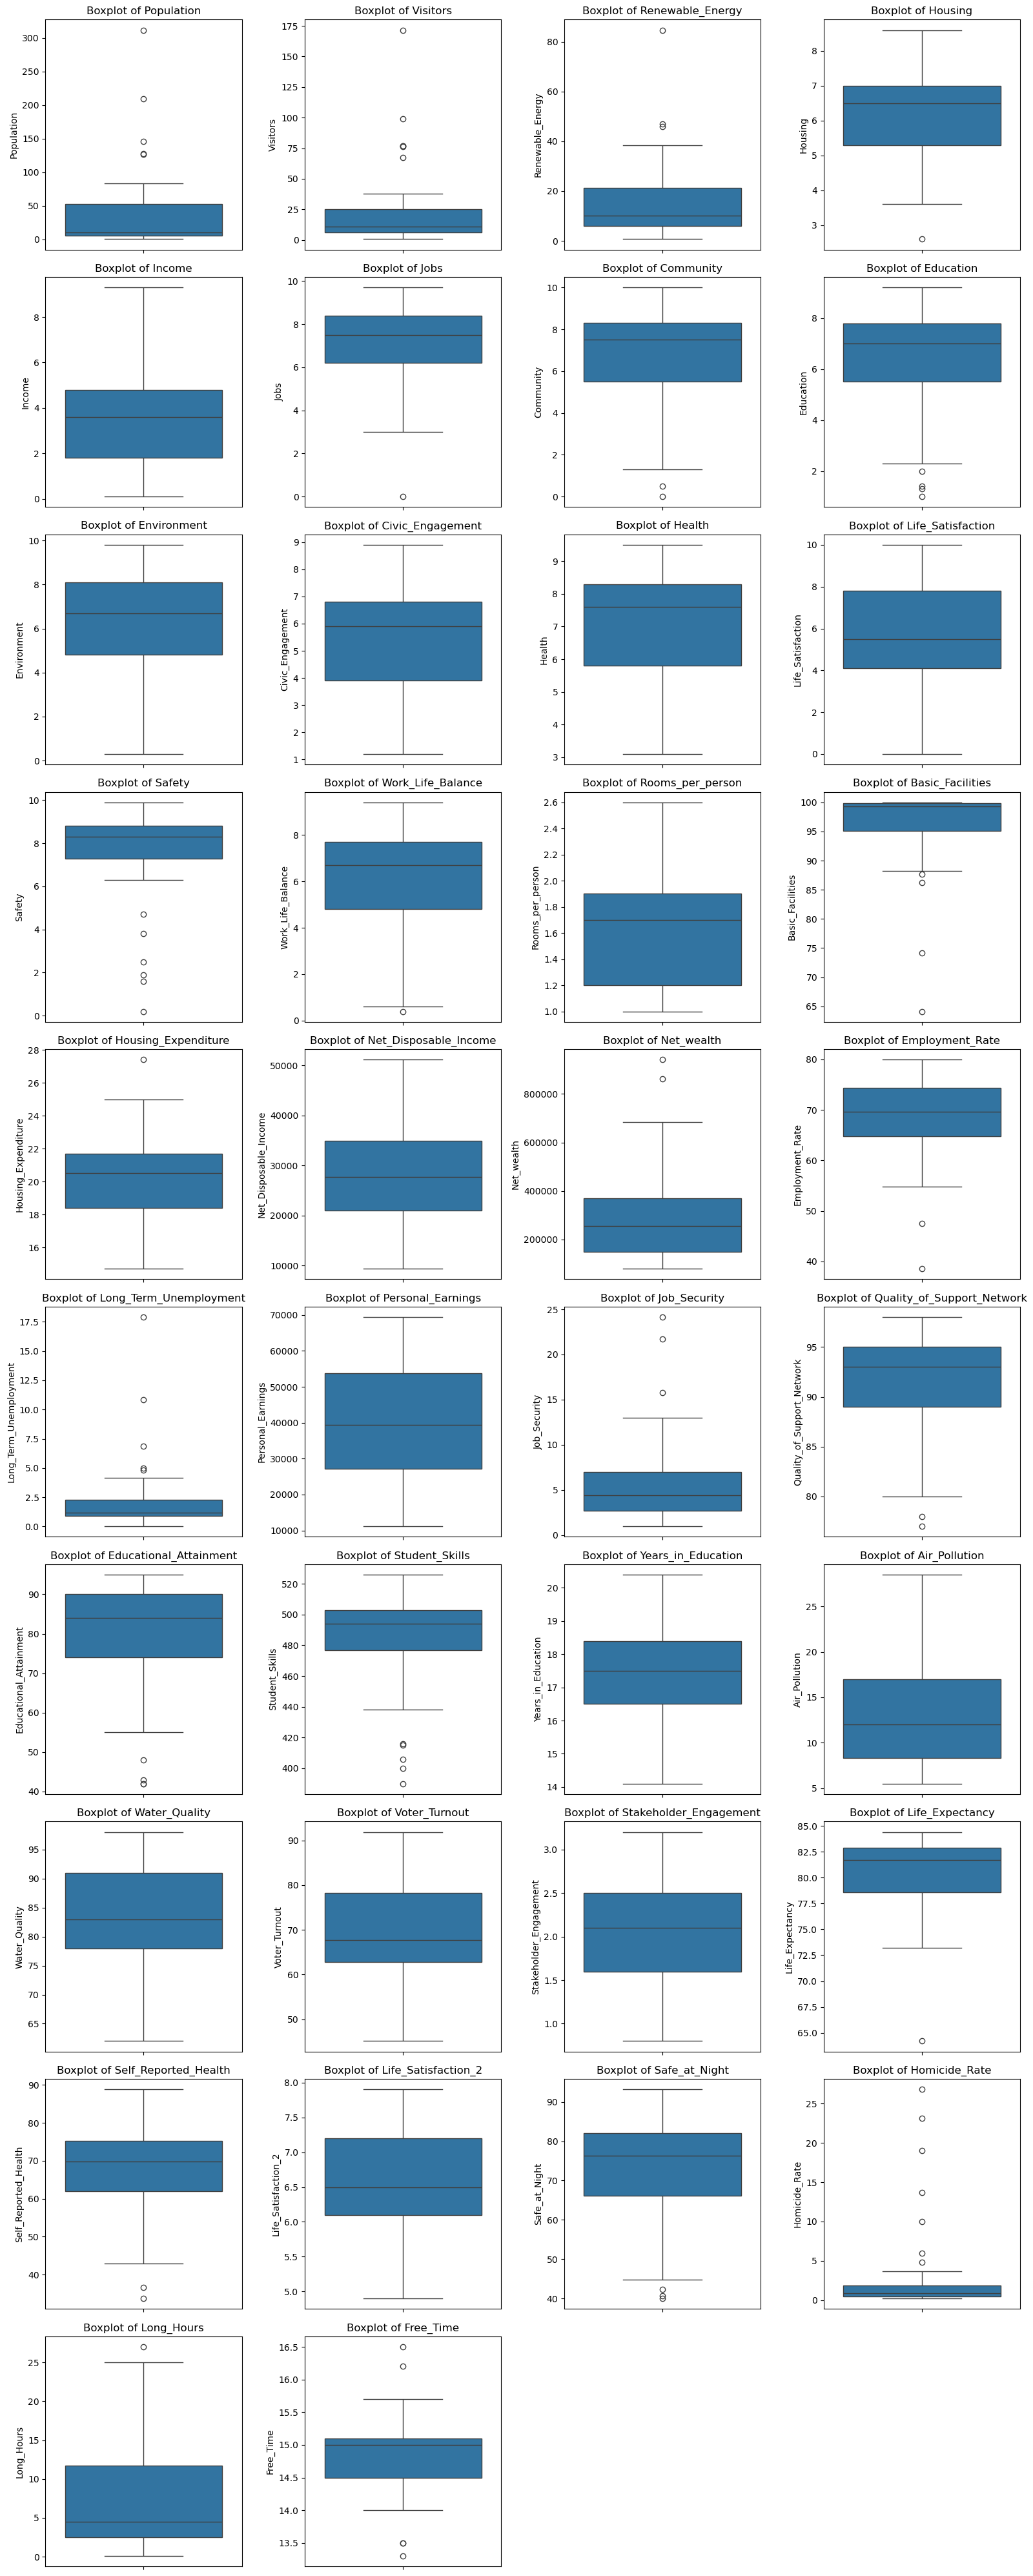

In [111]:
# Create separate boxplots for each numerical column. There are 38 numerical columns, so if we put 4 plots in a row, we will have 10 rows:

# Select numeric columns:
num_cols = df_betterlife.select_dtypes(include='number').columns

# Calculate the number of rows needed for the subplots:
n_cols_subplot = 4
n_rows_subplot = len(num_cols) // n_cols_subplot +1

# Create subplots
fig, axes = plt.subplots(nrows=n_rows_subplot, ncols=n_cols_subplot, figsize=(16, n_rows_subplot * 4))

# For easier iteration through the axes, we flatten axes out:
axes = axes.flatten()

# Loop through all the numeric columns and create a boxplot:
for i, column in enumerate(num_cols):
    sns.boxplot(y=df_betterlife[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Hide empty subplots:
for j in range(i + 1, len(axes)): 
    # Remove unused axes
    fig.delaxes(axes[j]) 


# Show all plots together
plt.tight_layout()
plt.show()


### 1.7 Explore outliers

As there are many columns, we write a function that returns the rows with the outliers. We regard as outliers the values outside of the 1.5 Interquartile range from the lower and upper quartiles. Going through the rows with outliers, most of them don't seem to be a mistake. For example the Population of the United States, Russia and Brazil are really much larger than that of the other countries. However, there are some other values that are more suspicious: Jobs, Community, Work-Life Balance. We have specifically checked these values on the original OECD webpage, where we could make sure that these are correct values. South Africa really has such low Indices in the category Jobs, Mexico and Greece in category Community.

In [112]:

def find_outlier_rows(df, column_name):
  """
  Identifies and returns rows of a pandas DataFrame that contain outliers in a specified column.

  Arguments:
      df (pandas Dataframe): DataFrame to analyze.
      column_name (str): Name of the column to check for outliers.

  Returns:
      DataFrame containing the rows with outliers in the specified column.
      Returns an empty DataFrame if no outliers are found.
  """
  if column_name not in df.columns:
    raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    
  data = df[column_name]
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  outlier_rows = df[(data < lower_bound) | (data > upper_bound)]
  return outlier_rows


#### Let's print the outlier values for each numeric column in Better Life dataframe:

In [113]:
# Numeric columns:
num_cols = df_betterlife.select_dtypes(include='number').columns

for col in num_cols:
    outlier_rows=find_outlier_rows(df_betterlife.copy(), col)
    if not outlier_rows.empty:
        print(f"Rows with Outliers in column {col}: ")
        print("-------------------------------------")
        print(outlier_rows[["Country", col]])



Rows with Outliers in column Population: 
-------------------------------------
               Country  Population
3               Brazil       209.5
20               Japan       127.2
25              Mexico       126.2
31  Russian Federation       145.7
40       United States       311.6
Rows with Outliers in column Visitors: 
-------------------------------------
          Country  Visitors
12         France      77.1
19          Italy      76.3
25         Mexico      76.7
29         Poland      67.4
35          Spain      99.2
40  United States     171.6
Rows with Outliers in column Renewable_Energy: 
-------------------------------------
    Country  Renewable_Energy
3    Brazil              45.8
16  Iceland              84.7
28   Norway              46.9
Rows with Outliers in column Housing: 
-------------------------------------
         Country  Housing
34  South Africa      2.6
Rows with Outliers in column Jobs: 
-------------------------------------
         Country  Jobs
34  

## 2. Merge Better Life Index dataframe with Happiness Index dataframe

### 2.1 Preparing the World Happiness Index Dataset for the merge with the Better Life Index Data

The World Happiness dataset contains the World Happiness Index in the "Ladder score" column from 2011 to 2024 for 169 countries. 

The World Happiness Index is an annual report published by the United Nations Sustainable Development Solutions Network (SDSN). It ranks countries based on their average self-assessed life evaluations, which are collected through the Gallup World Poll. The rankings are primarily based on a single question asked in the Gallup World Poll: "Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?" This is known as the Cantril Ladder question, that's why it can be found in the "Ladder score" column. We don't need the other columns. We create a filtered dataframe that only contains the Country name and the Ladder score for the year 2024. In the country name and the Ladder score columns we don't have any missing data.

In [114]:
#Length of World Happiness dataframe:
len(df_happiness)

1969

In [115]:
# Number of unique years in the dataset:
df_happiness["Year"].nunique()

13

In [116]:
# The years for which the dataset contain a Ladder score:
df_happiness["Year"].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2012, 2011])

In [117]:
# Number of countries in the dataframe:
df_happiness["Country name"].nunique()

169

In [118]:
# Check the data types and the number of missing values in the columns "Year", "Country name" and "Ladder score":
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        1969 non-null   int64  
 1   Rank                                        1969 non-null   int64  
 2   Country name                                1969 non-null   object 
 3   Ladder score                                1969 non-null   float64
 4   upperwhisker                                875 non-null    float64
 5   lowerwhisker                                875 non-null    float64
 6   Explained by: Log GDP per capita            872 non-null    float64
 7   Explained by: Social support                872 non-null    float64
 8   Explained by: Healthy life expectancy       870 non-null    float64
 9   Explained by: Freedom to make life choices  871 non-null    float64
 10  Explained by

In [119]:
df_happiness[df_happiness["Year"]==2024]

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
13,2024,2,Denmark,7.521,7.611,7.431,1.825,1.748,0.820,0.955,0.150,0.488,1.535
26,2024,3,Iceland,7.515,7.606,7.425,1.799,1.840,0.873,0.971,0.201,0.173,1.659
45,2024,4,Sweden,7.345,7.427,7.262,1.783,1.698,0.889,0.952,0.170,0.467,1.385
58,2024,5,Netherlands,7.306,7.372,7.240,1.822,1.667,0.844,0.860,0.186,0.344,1.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905,2024,143,Zimbabwe,3.396,3.509,3.283,0.827,0.961,0.178,0.598,0.065,0.131,0.636
1918,2024,144,Malawi,3.260,3.390,3.130,0.588,0.489,0.280,0.677,0.115,0.136,0.975
1931,2024,145,Lebanon,3.188,3.277,3.098,1.223,0.984,0.440,0.279,0.071,0.041,0.150
1943,2024,146,Sierra Leone,2.998,3.102,2.894,0.786,0.692,0.327,0.613,0.138,0.052,0.391


In [120]:
# We may need the original dataframe for further analysis, that's why we create a deep copy of the filtered data (filtered the year 2024):
df_happiness_filtered = df_happiness[df_happiness["Year"]==2024].copy()

# Keep only the columns "Country name" and "Ladder score":
columns_to_keep = ["Country name", "Ladder score"]
df_happiness_filtered = df_happiness_filtered[columns_to_keep].copy()

# Rename column from "Ladder score" to "Happiness_Index"
df_happiness_filtered.rename(columns={"Ladder score" : "Happiness_Index"}, inplace=True)
print(df_happiness_filtered)

      Country name  Happiness_Index
0          Finland            7.736
13         Denmark            7.521
26         Iceland            7.515
45          Sweden            7.345
58     Netherlands            7.306
...            ...              ...
1905      Zimbabwe            3.396
1918        Malawi            3.260
1931       Lebanon            3.188
1943  Sierra Leone            2.998
1956   Afghanistan            1.364

[147 rows x 2 columns]


### 2.2 Merge the Happiness Index data to the Better Life Index data

We want to left merge the Better Life dataframe (we keep all rows of it) with the 2024 Happiness Index dataframe using the "Country" and "Country name" columns. First we check whether we have Happiness Index data for all the countries appearing in the Better Life dataframe:

In [121]:
# Countries in the filtered 2024 Happiness Index dataframe:
countries_happiness=df_happiness_filtered["Country name"].unique()
df_happiness_filtered["Country name"].unique()

array(['Finland', 'Denmark', 'Iceland', 'Sweden', 'Netherlands',
       'Costa Rica', 'Norway', 'Israel', 'Luxembourg', 'Mexico',
       'Australia', 'New Zealand', 'Switzerland', 'Belgium', 'Ireland',
       'Lithuania', 'Austria', 'Canada', 'Slovenia', 'Czechia',
       'United Arab Emirates', 'Germany', 'United Kingdom',
       'United States', 'Belize', 'Poland', 'Taiwan Province of China',
       'Uruguay', 'Kosovo', 'Kuwait', 'Serbia', 'Saudi Arabia', 'France',
       'Singapore', 'Romania', 'Brazil', 'El Salvador', 'Spain',
       'Estonia', 'Italy', 'Panama', 'Argentina', 'Kazakhstan',
       'Guatemala', 'Chile', 'Viet Nam', 'Nicaragua', 'Malta', 'Thailand',
       'Slovakia', 'Latvia', 'Oman', 'Uzbekistan', 'Paraguay', 'Japan',
       'Bosnia and Herzegovina', 'Philippines', 'Republic of Korea',
       'Bahrain', 'Portugal', 'Colombia', 'Ecuador', 'Honduras',
       'Malaysia', 'Peru', 'Russian Federation', 'Cyprus', 'China',
       'Hungary', 'Trinidad and Tobago', 'Monteneg

In [122]:
# Countries in the Better Life Index dataframe:
countries_betterlife= df_betterlife["Country"].unique()
countries_betterlife

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Russian Federation',
       'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Türkiye', 'United Kingdom', 'United States'],
      dtype=object)

In [123]:
# Print number of countries in each dataframe:
print(f"Number of countries in the Better Life dataframe: {len(countries_betterlife)}")
print(f"Number of countries in the Happiness Index dataframe: {len(countries_happiness)}")

Number of countries in the Better Life dataframe: 41
Number of countries in the Happiness Index dataframe: 147


In [124]:
# Number of country names that are present in both dataframe:
countries_both=set(countries_betterlife).intersection(set(countries_happiness))
print(f"Number of countries present in both dataframe: {len(countries_both)}")

Number of countries present in both dataframe: 39


### From the 41 countries present in the Better Life dataframe, only 39 countries are present in the Happiness Index dataframe.

Let's investigate the missing Country names:

In [125]:
# Print the name of the countries that are present in the Better Life data but we haven't found them in the Happiness Index dataframe:
set(countries_betterlife)-countries_both

{'Korea', 'Slovak Republic'}

The countries Korea and Slovak Republic do not seem to be present in the Happiness Index dataframe. They may be present with another spelling or with a slightly different name:

In [126]:
# Check if any country contains "Slov" in countries_happiness:
matching_countries = {country for country in countries_happiness if "Slov" in country}

print(matching_countries)  # Output: {'Slovakia', 'Slovenia'}

{'Slovenia', 'Slovakia'}


### There is Slovakia in the Happiness Index data and Slovak Republic in Betterlife data. We change the country name in Betterlife index from Slovak Republic to Slovakia:

In [127]:
# Replace "Slovak Republic" with "Slovakia":
df_betterlife["Country"] = df_betterlife["Country"].replace("Slovak Republic", "Slovakia")

In [128]:
df_betterlife["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Russian Federation', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States'], dtype=object)

In [129]:
# Check if any country contains "Korea" in countries_happiness:
matching_countries = {country for country in countries_happiness if "Korea" in country}

print(matching_countries) 

{'Republic of Korea'}


### There is Korea in Betterlife Index data and Republic of Korea in Happiness Index data. We change the name Republic of Korea into Korea in the Happiness Index dataframe.


In [130]:
# Replace "Republic of Korea" with "Korea":
df_happiness_filtered["Country name"] = df_happiness_filtered["Country name"].replace("Republic of Korea", "Korea")

In [131]:
countries_happiness_renamed=df_happiness_filtered["Country name"].unique()

In [132]:
print(f"Korea is among the Happiness countries: {'Korea' in countries_happiness_renamed}")

Korea is among the Happiness countries: True


### It means we have data in the Happiness Index dataset for all the countries in Betterlife Index data. 

### We left-merge the Betterlife Index dataframe with the filtered Happiness Index dataframe (containing data only for the year 2024) using the 'Country' column and 'Country name' column:

In [133]:
# Left-merge Better Life Index dataframe and Happiness Index dataframe:
df_merged = df_betterlife.merge(df_happiness_filtered, left_on='Country', right_on='Country name',
          suffixes=('_left', '_right'))

In [134]:
# Set "Country" column as the index:
df_merged = df_merged.set_index("Country")

In [135]:
# Remove "Country name" column:
df_merged.drop( columns=["Country name"], inplace=True)

## 3.  Analysis of the correlation between Happiness and Better Life metrics

### 3.1 Correlation between Happiness Index and Better Life Metrics

Examining the correlation matrix reveals a strong alignment between the Happiness Index and Life Satisfaction, suggesting these two independent measures provide consistent insights into individuals' overall well-being.

Beyond this inherent overlap, the **Happiness Index** is most strongly correlated with **Environment, Jobs, and Health,** indicating that these factors play a significant role in shaping reported happiness levels. **Income, Housing, and Community** also exhibit notable positive correlations with the Happiness Index. Interestingly, Work-Life Balance shows the weakest correlation with the Happiness Index among the considered metrics.

When examining the drivers of **Life Satisfaction**, **Environment, Jobs, Income, and Health** emerge as the most influential factors. Conversely, Civic Engagement and Work-Life Balance demonstrate the weakest correlations with individuals' reported life satisfaction.

In summary, while Life Satisfaction is intrinsically linked to the Happiness Index, both are significantly influenced by environmental quality, job prospects, and health status. Income and housing also contribute substantially to both measures. The lower correlation of Work-Life Balance with both indices suggests that while potentially important, it may not be as directly or universally impactful on overall happiness and life satisfaction as the other metrics in this analysis. 




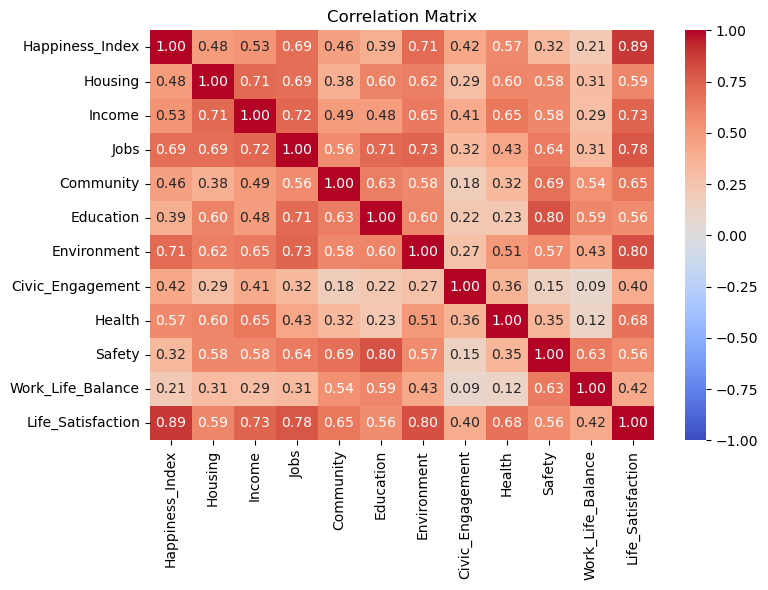

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_merged[["Happiness_Index", "Housing", "Income", "Jobs" , "Community" , "Education" ,"Environment", "Civic_Engagement",
                         "Health", "Safety", "Work_Life_Balance", "Life_Satisfaction"]].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("betterlife_correlation.jpg")
plt.show()

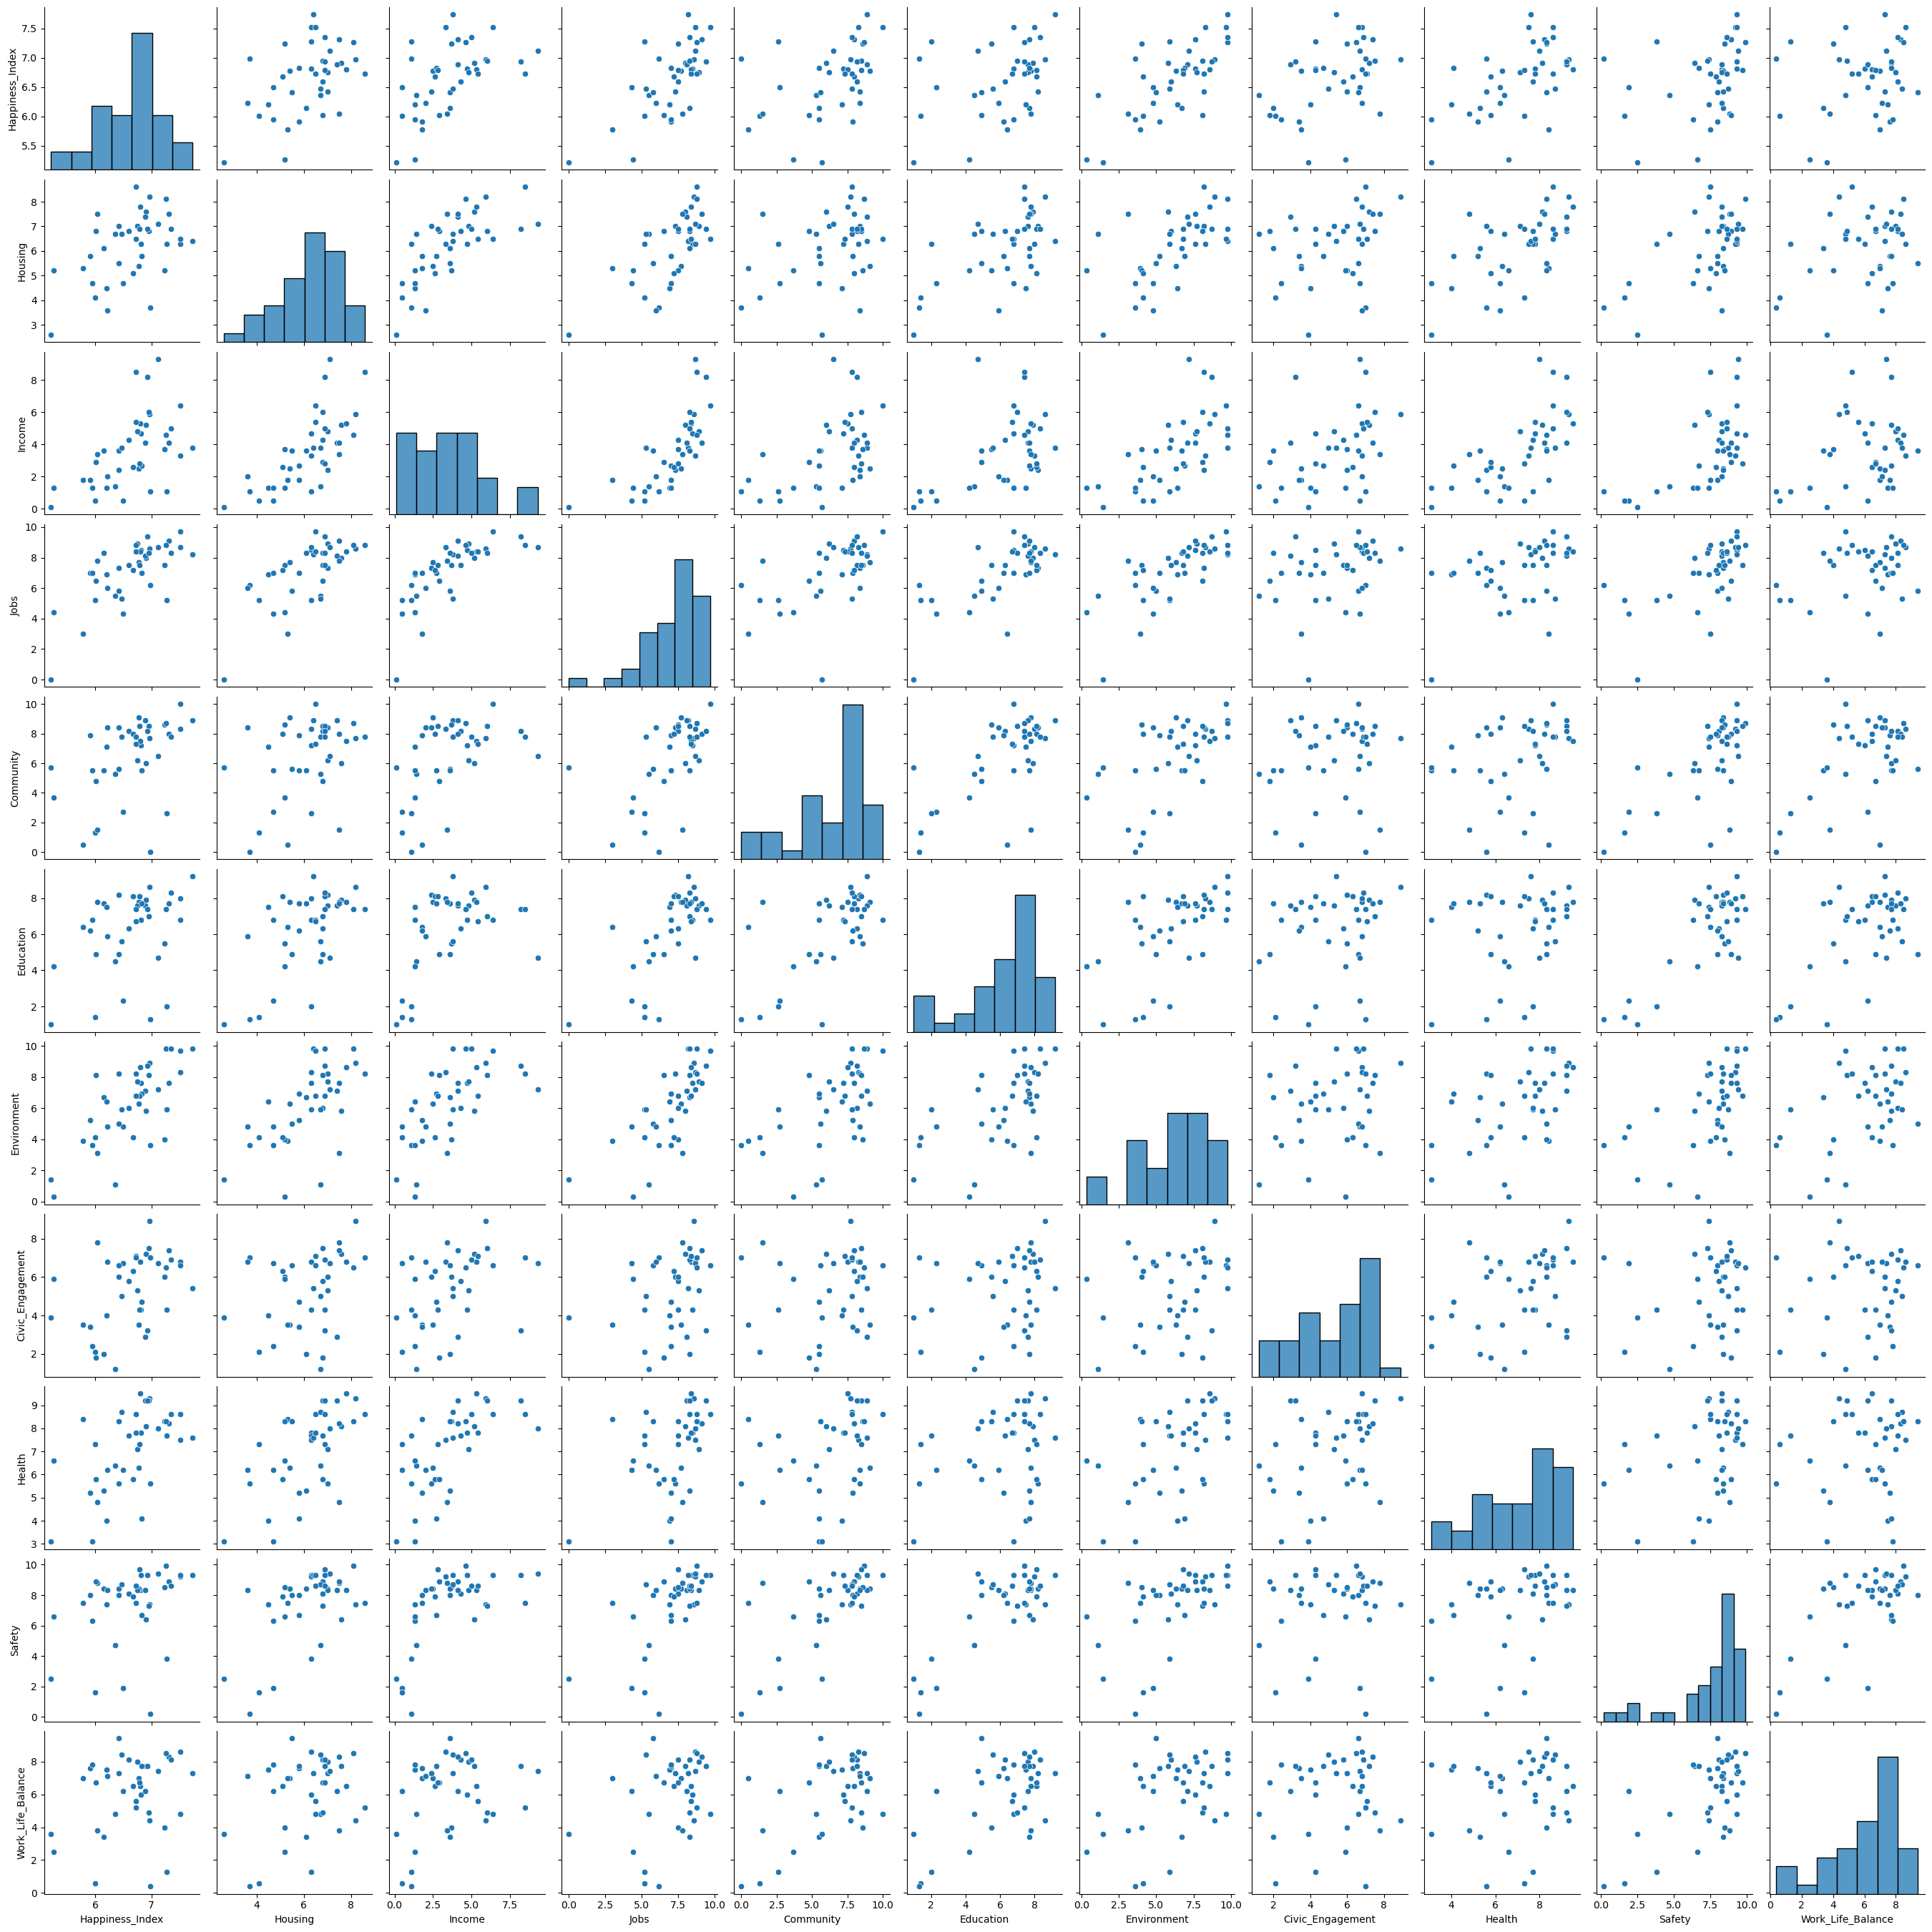

In [62]:
sns.pairplot(data=df_merged[["Happiness_Index", "Housing", "Income", "Jobs" , "Community" , "Education" ,"Environment", "Civic_Engagement",  "Health", "Safety", "Work_Life_Balance"]])
plt.show()

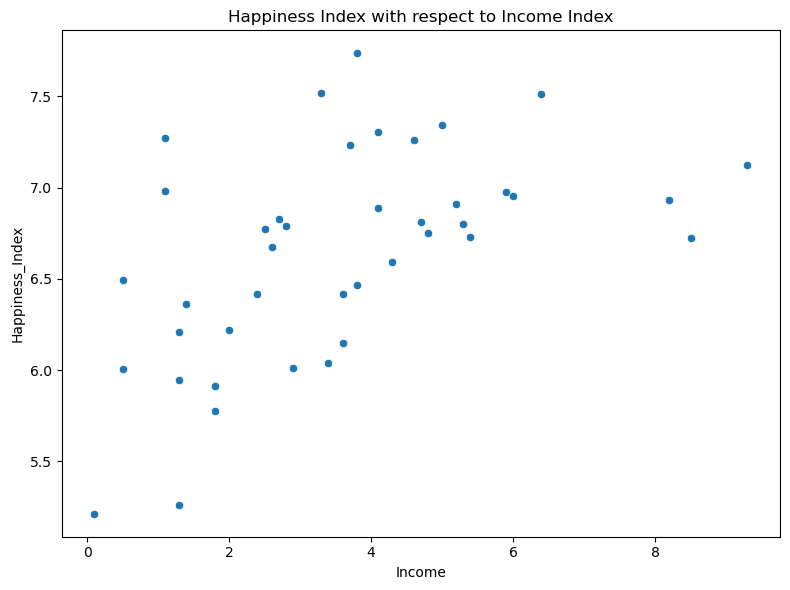

In [147]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x="Income", y="Happiness_Index")

plt.title("Happiness Index with respect to Income Index")
plt.tight_layout()
plt.savefig("happiness_vs_income.jpg")
plt.show()

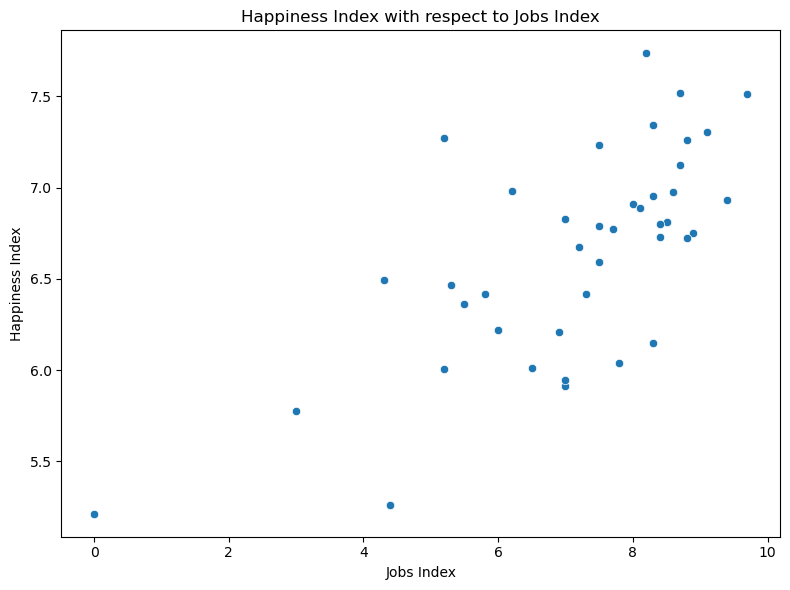

In [153]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x="Jobs", y="Happiness_Index")
plt.xlabel("Jobs Index")
plt.ylabel("Happiness Index")
plt.title("Happiness Index with respect to Jobs Index")
plt.tight_layout()
plt.savefig("happiness_vs_jobs.jpg")
plt.show()

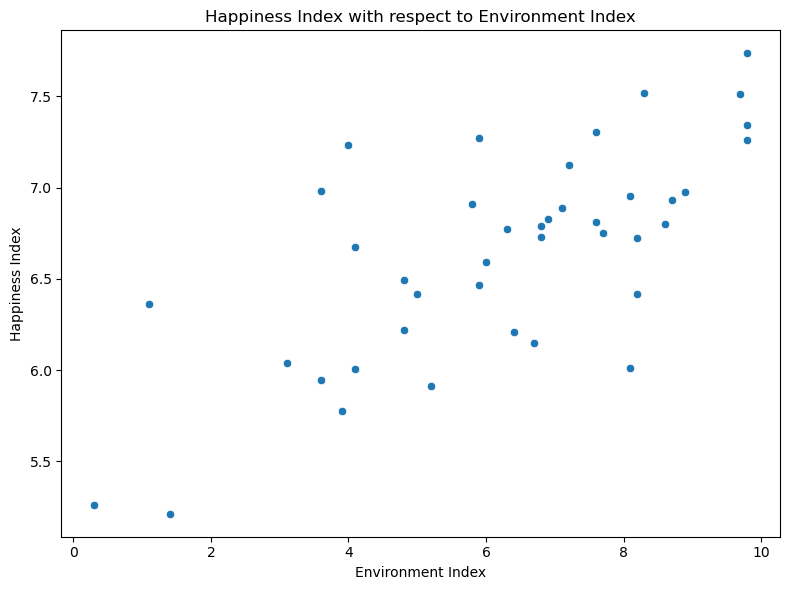

In [154]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x="Environment", y="Happiness_Index")
plt.xlabel("Environment Index")
plt.ylabel("Happiness Index")
plt.title("Happiness Index with respect to Environment Index")
plt.tight_layout()
plt.savefig("happiness_vs_environment.jpg")
plt.show()

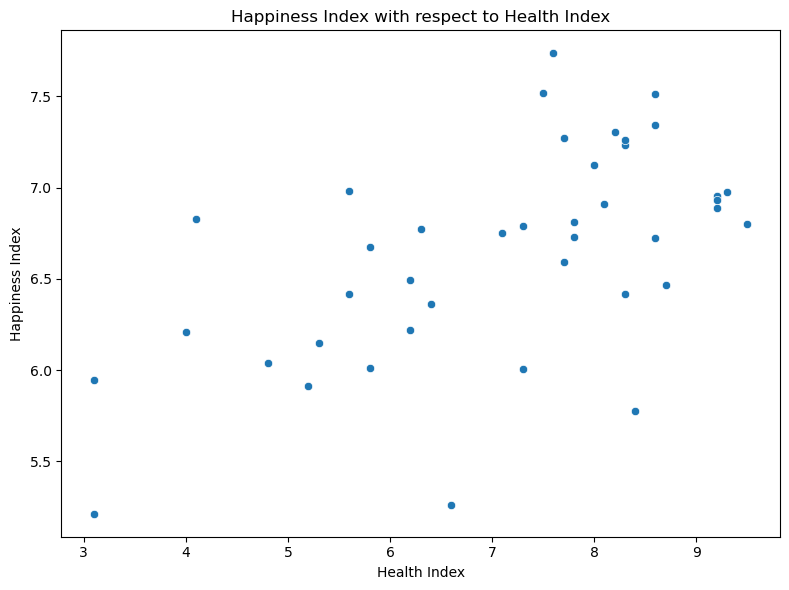

In [155]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x="Health", y="Happiness_Index")
plt.xlabel("Health Index")
plt.ylabel("Happiness Index")
plt.title("Happiness Index with respect to Health Index")
plt.tight_layout()
plt.savefig("happiness_vs_health.jpg")
plt.show()

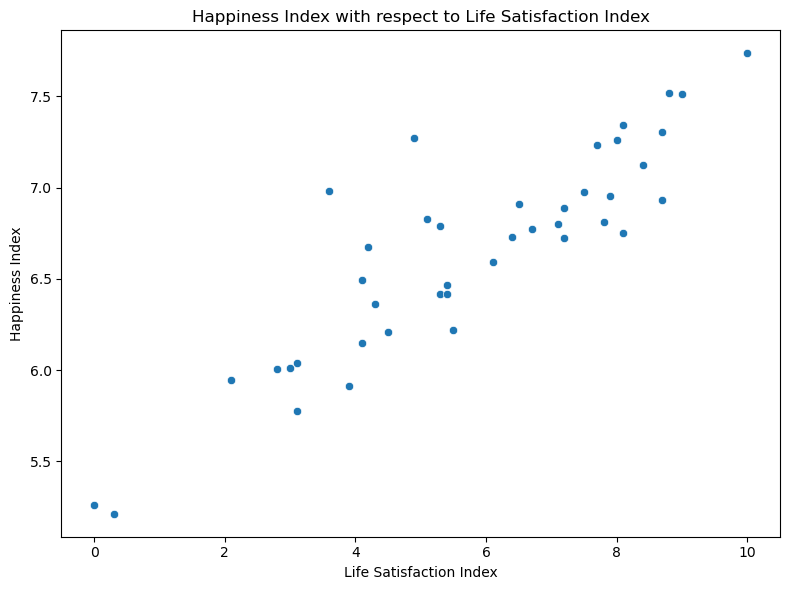

In [156]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x="Life_Satisfaction", y="Happiness_Index")
plt.xlabel("Life Satisfaction Index")
plt.ylabel("Happiness Index")
plt.title("Happiness Index with respect to Life Satisfaction Index")
plt.tight_layout()
plt.savefig("happiness_vs_lifesatisfaction.jpg")
plt.show()

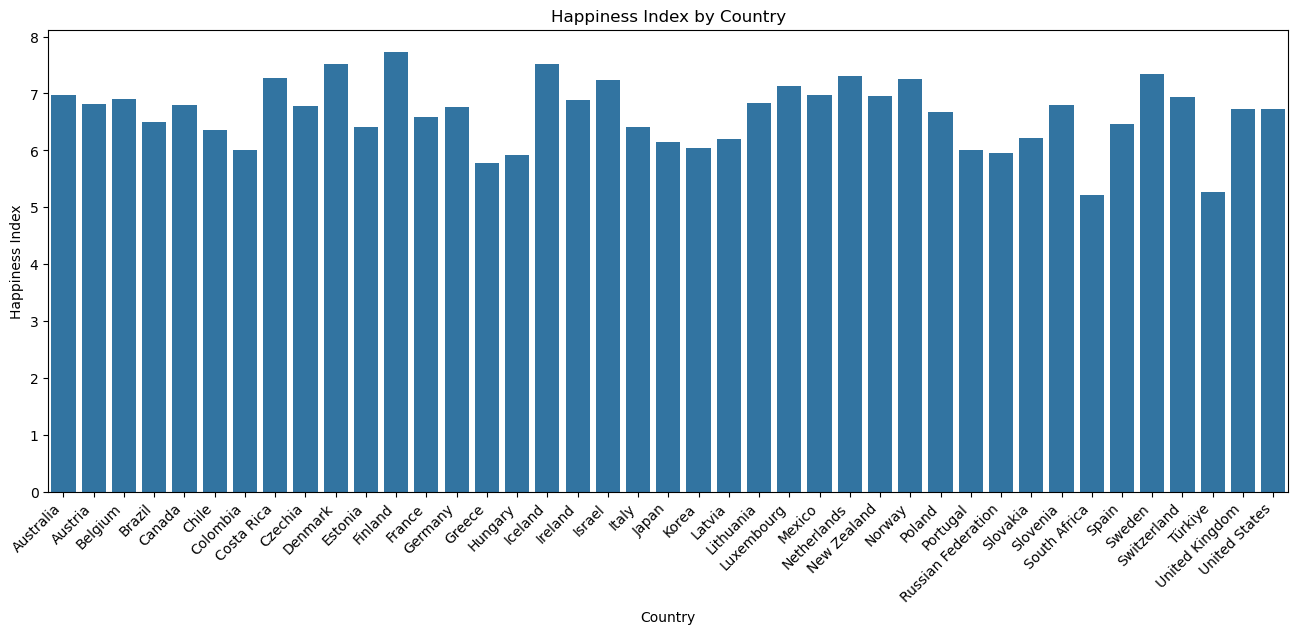

In [182]:
plt.figure(figsize=(16, 6)) 
sns.barplot( x=df_merged.index, y=df_merged["Happiness_Index"])
plt.xlabel('Country')
plt.ylabel('Happiness Index')
plt.title('Happiness Index by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()
plt.show()

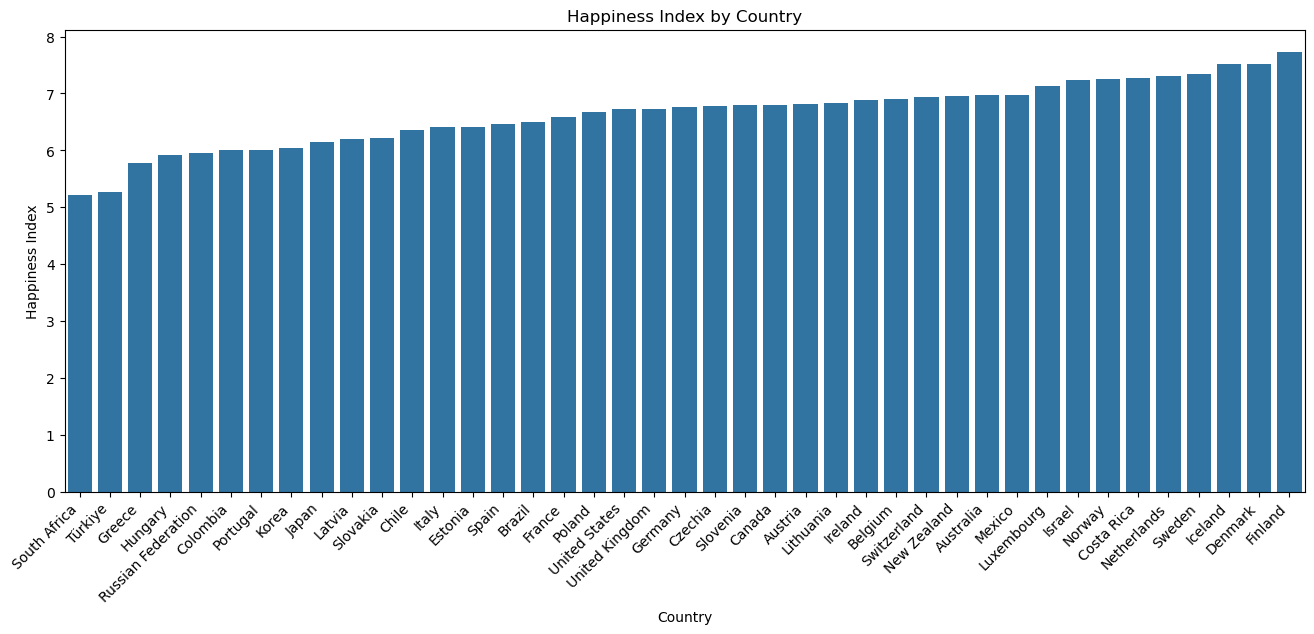

In [183]:
# Extract the 'Population' column as a Series
population_series = df_merged['Happiness_Index']

# Sort by Population values
population_sorted_values = population_series.sort_values()

plt.figure(figsize=(16, 6)) 
sns.barplot( x=population_sorted_values.index, y=population_sorted_values.values)
plt.xlabel('Country')
plt.ylabel('Happiness Index')
plt.title('Happiness Index by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()
plt.show()

See the Streamlit App for more plots.

## 4. Fitting statistical models

In [184]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.patches as mpatches

### 4.1 Multiple Linear Regression model

We would like to fit a Multiple Linear Regression model to predict Happiness Index using the 11 Better Life Index Topics. We saw the high correlation between the Happiness Index and Life Satisfaction Index, which can cause multicollinearity. Let's check for multicollinearity using Variance Inflation Factor: 

In [185]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define independent variables (X)
X = df_merged[["Housing", "Income", "Jobs" , "Community" , "Education" ,"Environment", "Civic_Engagement",  "Health", "Safety", "Work_Life_Balance", "Life_Satisfaction",  "Happiness_Index"]]  
X = sm.add_constant(X)  # Add intercept

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


             Variable         VIF
0               const  807.939833
1             Housing    3.560936
2              Income    4.697611
3                Jobs    6.147077
4           Community    2.689645
5           Education    4.736072
6         Environment    3.425092
7    Civic_Engagement    1.428653
8              Health    3.442749
9              Safety    4.454235
10  Work_Life_Balance    2.346989
11  Life_Satisfaction   18.047184
12    Happiness_Index    8.637310


The summary shows what we expected: Life Satisfaction has very large values (>10) which indicates a significant problem that can affect the stability and interpretability of our regression coefficients. For this reason we exclude Life Satisfaction as a predictor. We fit a linear regression model using the 10 other Better Life Index variables as predictors.

In [186]:
# Fit a Multiple linear Regression model:
lm_1 = smf.ols("Happiness_Index ~ Housing +Income +Jobs + Community + Education + Environment + Civic_Engagement + Health + Safety + Work_Life_Balance ", data=df_merged).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Index   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     8.199
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           3.21e-06
Time:                        19:37:19   Log-Likelihood:                -8.3281
No. Observations:                  41   AIC:                             38.66
Df Residuals:                      30   BIC:                             57.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.4579      0.41

**Interpretation:** Taking into account all Better Life Topics except for Life Satisfaction, we only have evidence that "Jobs", "Environment" and "Health" have an influence on Happiness Index. One unit increase in the Jobs Index causes 0.2 unit increase in Happiness Index if all the other variable do not change. One unit increase in Environment Index causes 0.08 unit increase, one unit increase in Health Index causes 0.11 unit increase in Happiness Index in average, assuming all the other predictors do not change.

## 5. Conclusion

The findings of the linear regression model align with the insights gained from the correlation matrix, underscoring the significant influence of Jobs, Health, and Environment on Happiness levels within this dataset. Specifically, the model highlights the importance of factors encompassed by these topics: Job Security, Personal Earnings, Unemployment rates, and overall Employment within the Jobs domain; Self-reported Health and Life Expectancy for Health; and Water Quality and Air Pollution concerning the Environment.

These results suggest that individuals' well-being, as measured by the Happiness Index, is strongly associated with their economic stability and opportunities, their physical health and longevity, and the quality of their surrounding natural environment.

It is important to acknowledge that this analysis is based on a relatively small dataset. While the observed relationships are consistent, a larger and more diverse dataset could potentially yield more precise and robust results, potentially uncovering additional contributing factors or nuances in the relationship between these Better Life Index topics and overall happiness. Further research with expanded data would be valuable to confirm and refine these findings.

## 6. Following Indicator-Level Analysis

Having established that the Better Life Topics of Jobs, Health, and Environment are the most influential predictors of the Happiness Index, we further investigated the specific contributions of the underlying indicators that comprise these indices. To achieve this, we fitted separate linear regression models, using the individual indicators within each of these key topics as predictors for the Happiness Index. This granular approach allows us to identify which specific facets of Jobs, Health, and Environment have the most direct and measurable impact on reported happiness levels.

In [187]:
df_merged.columns

Index(['Population', 'Visitors', 'Renewable_Energy', 'Housing', 'Income',
       'Jobs', 'Community', 'Education', 'Environment', 'Civic_Engagement',
       'Health', 'Life_Satisfaction', 'Safety', 'Work_Life_Balance',
       'Rooms_per_person', 'Basic_Facilities', 'Housing_Expenditure',
       'Net_Disposable_Income', 'Net_wealth', 'Employment_Rate',
       'Long_Term_Unemployment', 'Personal_Earnings', 'Job_Security',
       'Quality_of_Support_Network', 'Educational_Attainment',
       'Student_Skills', 'Years_in_Education', 'Air_Pollution',
       'Water_Quality', 'Voter_Turnout', 'Stakeholder_Engagement',
       'Life_Expectancy', 'Self_Reported_Health', 'Life_Satisfaction_2',
       'Safe_at_Night', 'Homicide_Rate', 'Long_Hours', 'Free_Time',
       'Happiness_Index', 'Happiness_Index_Scaled'],
      dtype='object')

In [188]:
# Fit a Multiple linear Regression model:
lm_2 = smf.ols("Happiness_Index ~ Job_Security + Personal_Earnings + Long_Term_Unemployment + Employment_Rate +Self_Reported_Health +Life_Expectancy + Water_Quality+Air_Pollution", data=df_merged).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Index   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     8.574
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           3.67e-06
Time:                        19:37:21   Log-Likelihood:                -11.852
No. Observations:                  41   AIC:                             41.70
Df Residuals:                      32   BIC:                             57.13
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [189]:

# Define independent variables (X)
X = df_merged[[ "Job_Security", "Personal_Earnings" ,"Long_Term_Unemployment", "Employment_Rate", "Self_Reported_Health", "Life_Expectancy", "Water_Quality", "Air_Pollution", "Happiness_Index"]]  
X = sm.add_constant(X)  # Add intercept

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Variable          VIF
0                   const  1535.823444
1            Job_Security     8.100609
2       Personal_Earnings     3.916211
3  Long_Term_Unemployment     5.751995
4         Employment_Rate     6.106512
5    Self_Reported_Health     2.179269
6         Life_Expectancy     2.289859
7           Water_Quality     2.779650
8           Air_Pollution     2.657842
9         Happiness_Index     3.143561


In [190]:
# Define independent variables (X)
X = df_merged[[ "Personal_Earnings" ,"Long_Term_Unemployment", "Employment_Rate", "Self_Reported_Health", "Life_Expectancy", "Water_Quality", "Air_Pollution", "Happiness_Index"]]  
X = sm.add_constant(X)  # Add intercept

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Variable          VIF
0                   const  1534.843469
1       Personal_Earnings     2.963723
2  Long_Term_Unemployment     2.659848
3         Employment_Rate     5.878581
4    Self_Reported_Health     1.934375
5         Life_Expectancy     2.036169
6           Water_Quality     2.730613
7           Air_Pollution     2.637882
8         Happiness_Index     2.718249


In [191]:
# Fit a Multiple linear Regression model:
lm_3 = smf.ols("Happiness_Index ~  Personal_Earnings + Long_Term_Unemployment + Employment_Rate +Self_Reported_Health +Life_Expectancy + Water_Quality+Air_Pollution", data=df_merged).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Index   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     8.100
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.01e-05
Time:                        19:37:22   Log-Likelihood:                -14.832
No. Observations:                  41   AIC:                             45.66
Df Residuals:                      33   BIC:                             59.37
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

In [192]:
# Fit a Multiple linear Regression model:
lm_4 = smf.ols("Happiness_Index ~  Personal_Earnings + Long_Term_Unemployment + Self_Reported_Health +Life_Expectancy + Water_Quality+Air_Pollution", data=df_merged).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness_Index   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     9.671
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           3.23e-06
Time:                        19:37:22   Log-Likelihood:                -14.919
No. Observations:                  41   AIC:                             43.84
Df Residuals:                      34   BIC:                             55.83
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [193]:
# Define independent variables (X)
X = df_merged[[ "Personal_Earnings" ,"Long_Term_Unemployment",  "Self_Reported_Health", "Life_Expectancy", "Water_Quality", "Air_Pollution", "Happiness_Index"]]  
X = sm.add_constant(X)  # Add intercept

# Compute VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 Variable          VIF
0                   const  1156.910664
1       Personal_Earnings     2.662181
2  Long_Term_Unemployment     1.903535
3    Self_Reported_Health     1.483562
4         Life_Expectancy     2.033162
5           Water_Quality     2.208840
6           Air_Pollution     1.824351
7         Happiness_Index     2.706681


## 6. Conclusion (Following Indicator-Level Analysis)
   
Further investigation through a linear regression model utilizing specific indicators within the key Better Life Index topics reveals a more granular understanding of their impact on the Happiness Index. The analysis indicates that Long-Term Unemployment Rate (within the Jobs topic), Self-Reported Health (within the Health topic), and Water Quality (within the Environment topic) emerge as statistically significant predictors of happiness in this model.

Specifically, a higher Long-Term Unemployment Rate appears to negatively affect happiness, suggesting the detrimental impact of prolonged joblessness on individual well-being. Conversely, better Self-Reported Health is associated with higher happiness levels, underscoring the crucial role of perceived health status. Finally, higher Water Quality also positively correlates with happiness, highlighting the importance of environmental factors, particularly access to clean resources, for overall life satisfaction.

While the broader topics of Jobs, Health, and Environment were identified as important based on correlation, this more detailed analysis pinpoints specific indicators within these domains that exert a measurable influence on the Happiness Index in this model. As with the previous analysis on topic-level data, it remains important to consider the size and scope of the dataset when interpreting these findings. Future research with larger and more diverse datasets could further validate these specific indicator-level relationships and potentially uncover additional nuanced effects.